### Exploring the data

In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',80)
pd.set_option('display.max_colwidth', 0)
os.getcwd()

'/Users/beth/Documents/Repositories/Kaggle/HousingPrices'

In [2]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

MoSold and YrSold - should convert to dates? Category features would need to be one-hot-encoded for some models, when to use the 'category' class in pandas?

In [4]:
numerical_column_info = train.describe().transpose()
numerical_column_info['std/mean'] = numerical_column_info['std']/numerical_column_info['mean']
numerical_column_info['NAs'] = train.select_dtypes(include=[np.number]).isna().sum()
numerical_column_info['zeros'] = (train.select_dtypes(include=[np.number])==0).sum()
display(numerical_column_info.sort_values('std/mean', ascending=False))

,count,mean,std,min,25%,50%,75%,max,std/mean,NAs,zeros
PoolArea,1460.0,2.758904,40.177307,0.0,0.00,0.0,0.00,738.0,14.562778,0,1453
MiscVal,1460.0,43.489041,496.123024,0.0,0.00,0.0,0.00,15500.0,11.408001,0,1408
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.00,0.0,0.00,508.0,8.598494,0,1436
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0,8.319430,0,1434
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0,4.149748,0,1378
ScreenPorch,1460.0,15.060959,55.757415,0.0,0.00,0.0,0.00,480.0,3.702116,0,1344
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,3.465556,0,1293
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.00,0.0,0.00,552.0,2.783950,0,1252
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,1.746306,8,861
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.00,25.0,68.00,547.0,1.419967,0,656


OverallCond, OverallQual are ok as an ordinal 'category'. Even though there aren't that many NA values, about half of these features have a lot of 0s, which are kind of like NA (square foot of features that don't exist in the house)

<AxesSubplot:title={'center':'Sale Price Histogram'}, ylabel='Frequency'>

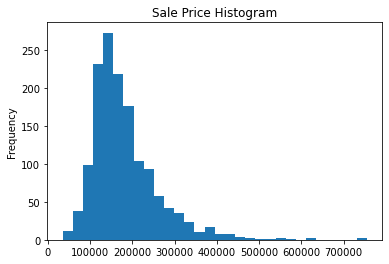

In [5]:
train['SalePrice'].plot(kind = 'hist', title = 'Sale Price Histogram', bins=30)

<AxesSubplot:title={'center':'Sale Price Histogram'}, ylabel='Frequency'>

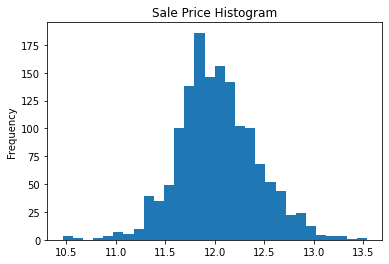

In [6]:
np.log(train['SalePrice']).plot(kind = 'hist', title = 'Sale Price Histogram', bins=30)

The distribution of Sale Price doesn't have a huge skew to high values, but there are some outliers. The model should fit the log of the sale price, because the error metric is RMSE of the log of the sale price

In [7]:
train.drop('Id',axis=1,inplace=True)

In [9]:
#get correlations of object variables with SalePrice
outcome_corr = train.corr(method='spearman')['SalePrice'].sort_values(ascending=False)
outcome_corr

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePrice, dtype: float64

Overall quality, living area, garage, and year built are the most strongly correlated with sale price. Spearman was used because we might want to also look at variables squared in the model (not linear relationship). 

In [10]:
for col in train.select_dtypes(include=['object']).columns:
    print(col)
    print(train[col].value_counts())
    print('\n')

MSZoning
RL         1151
RM         218 
FV         65  
RH         16  
C (all)    10  
Name: MSZoning, dtype: int64


Street
Pave    1454
Grvl    6   
Name: Street, dtype: int64


Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64


LotShape
Reg    925
IR1    484
IR2    41 
IR3    10 
Name: LotShape, dtype: int64


LandContour
Lvl    1311
Bnk    63  
HLS    50  
Low    36  
Name: LandContour, dtype: int64


Utilities
AllPub    1459
NoSeWa    1   
Name: Utilities, dtype: int64


LotConfig
Inside     1052
Corner     263 
CulDSac    94  
FR2        47  
FR3        4   
Name: LotConfig, dtype: int64


LandSlope
Gtl    1382
Mod    65  
Sev    13  
Name: LandSlope, dtype: int64


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst    86 
Gilbert    79 
NridgHt    77 
Sawyer     74 
NWAmes     73 
SawyerW    59 
BrkSide    58 
Crawfor    51 
Mitchel    49 
NoRidge    41 
Timber     38 
IDOTRR     37 
ClearCr    28 
SWISU      25 
StoneBr    25 
Blmngtn    17 

some of the categorical features have really low frequency values - what should be the cutoff to exclude them? Also some of these can be ordinal (_Qual, _QU, _QC, _Cond)

In [11]:
import scipy.stats as stats

In [12]:
pvals=[]

for col in train.select_dtypes(include=['object']).columns:
    values = train[col].value_counts().index
    samples = []
    for v in values:
        samples.append(np.array(train[train[col]==v]['SalePrice']))
    _, pvalue = stats.f_oneway(*samples)
    pvals.append((col,pvalue))

In [13]:
pvals.sort(key=lambda x: x[1])

In [14]:
pvals

[('Neighborhood', 1.558600282771154e-225),
 ('ExterQual', 1.4395510967787893e-204),
 ('KitchenQual', 3.0322127528400614e-192),
 ('BsmtQual', 9.610615106781709e-186),
 ('GarageFinish', 1.1991165312294262e-93),
 ('Foundation', 5.791895002232233e-91),
 ('HeatingQC', 2.667062092104357e-67),
 ('GarageType', 1.247153670658973e-66),
 ('MasVnrType', 4.793331178118786e-65),
 ('BsmtFinType1', 1.8077310066862167e-63),
 ('SaleCondition', 7.988268404991176e-44),
 ('Exterior1st', 2.5860887286376316e-43),
 ('Exterior2nd', 4.8421856706985465e-43),
 ('BsmtExposure', 1.022670629183227e-42),
 ('SaleType', 5.039766889462451e-42),
 ('MSZoning', 8.817633866272648e-35),
 ('HouseStyle', 3.376776535121222e-25),
 ('LotShape', 6.447523852011766e-25),
 ('CentralAir', 1.8095061559267854e-22),
 ('FireplaceQu', 5.016300447019087e-19),
 ('Electrical', 1.6632487814737638e-18),
 ('PavedDrive', 1.803568890651533e-18),
 ('RoofStyle', 3.653523047099125e-17),
 ('BldgType', 2.0567364604967015e-10),
 ('BsmtCond', 5.136900937

<AxesSubplot:title={'center':'SalePrice'}, xlabel='Neighborhood'>

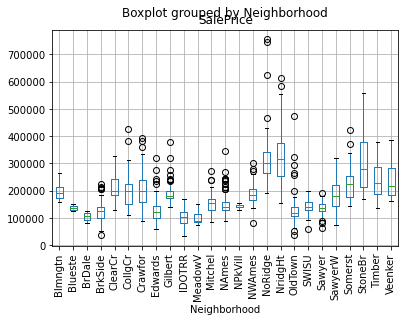

In [16]:
train.boxplot(by='Neighborhood',column='SalePrice',rot=90)